In [1]:
import pandas as pd
import numpy as np
from plotnine import *
#from plotnine.data import *
import matplotlib.pyplot as plt 
import seaborn as sns

df=pd.read_csv("Facet_Data.csv")
df

,age,tau,Class,SOD,male
0,0.987624,6.297754,Control,5.609472,0
1,0.986667,6.270988,Control,5.723585,1
2,0.986702,6.152733,Control,5.771441,0
3,0.987163,6.623707,Control,5.655992,0
4,0.985465,5.740789,Control,5.509388,1
...,...,...,...,...,...
328,0.987849,5.767258,Uncertain,5.342334,1
329,0.986684,6.145622,Uncertain,5.347108,0
330,0.988263,5.897676,Uncertain,5.676754,1
331,0.984351,4.805741,Uncertain,4.875197,1


## Matplotlib

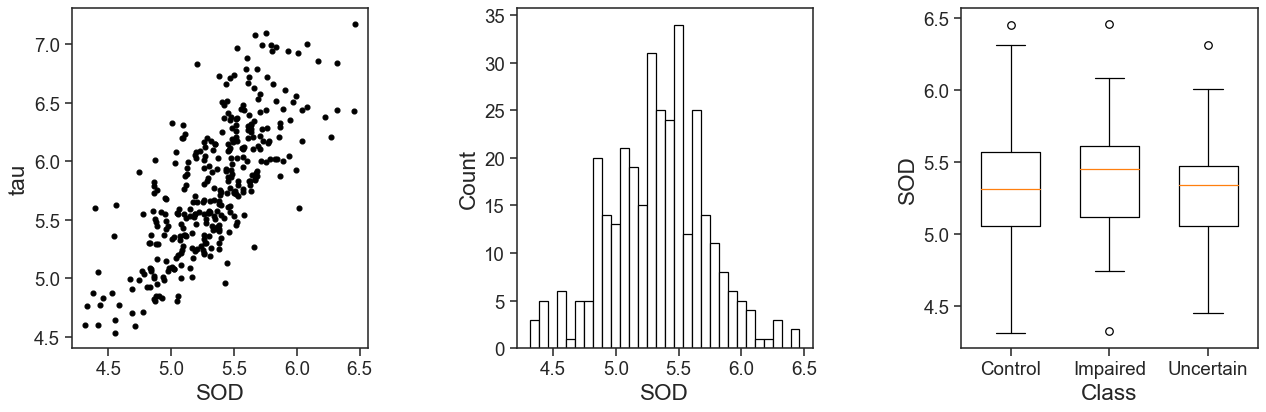

In [2]:
#-------------------------Matplotlib----------------------------
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12, 
                    'axes.labelsize': 18, 'legend.fontsize':15, 
                    'xtick.labelsize': 15,'ytick.labelsize': 15})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5), dpi =90)
plt.subplots_adjust(wspace=0.5, hspace=0)

# 散点图
ax1.set_xlabel('SOD')
ax1.set_ylabel('tau')
ax1.scatter(df['SOD'], df['tau'], c='black', s=15,  marker='o') 
# c='red'定义为红色，alpha是透明度，marker是画的样式 ,edgecolors="black"
# plt.legend(loc='best')
# plt.show()
# fig.savefig("scatter_plt.pdf")

# 直方图
plt.rcParams["patch.force_edgecolor"] = True
ax2.set_xlabel('SOD')
ax2.set_ylabel('Count')
n, bins, patches = ax2.hist(df['SOD'], 30, density=False, facecolor='w',edgecolor="k")
#fig.savefig("hist_plt.pdf")

# 箱形图 
labels=np.unique(df['Class'])
all_data = [df[df['Class']==label]['SOD'] for label in labels]

ax3.set_xlabel('Class')
ax3.set_ylabel('SOD')
ax3.boxplot(all_data,
            widths =0.6,
            notch=False,
            #sym='.',    
            #vert=True,
            labels=labels);

# plt.show()
# fig.savefig("boxplot_plt.pdf")

## Seaborn

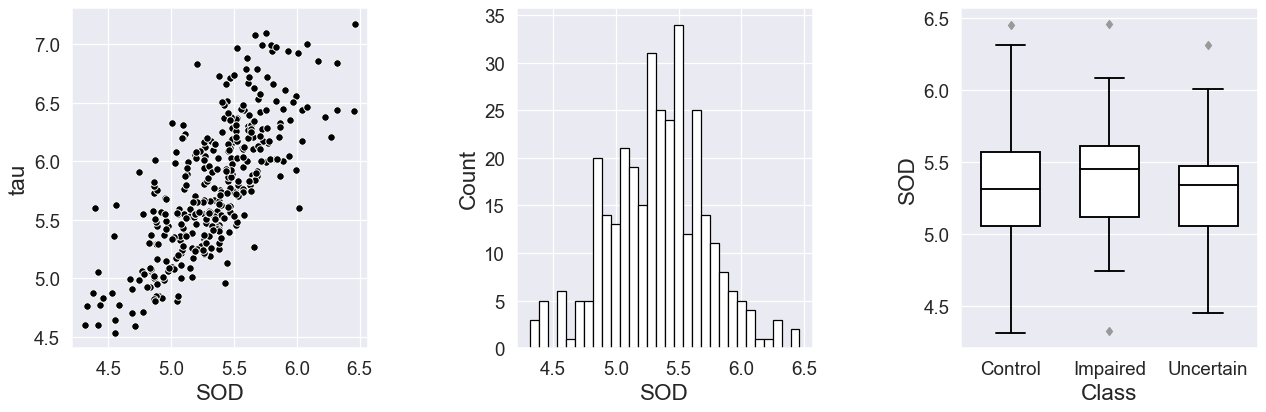

In [3]:
#-------------------------Seaborn----------------------------
sns.set_style("darkgrid")
sns.set_context("notebook", font_scale=1.5,
                rc={'font.size': 12, 
                    'axes.labelsize': 18, 'legend.fontsize':15, 
                    'xtick.labelsize': 15,'ytick.labelsize': 15})

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17,5), dpi =90)
plt.subplots_adjust(wspace=0.5, hspace=0)                    


scatter_sns=sns.scatterplot(x="SOD", y="tau", data=df, color='k', ax=ax1)
# scatter_sns.savefig('scatter_sns.pdf')


plt.rcParams["patch.force_edgecolor"] = True
hist_sns=sns.distplot(df['SOD'], kde=False,bins=30,
                      hist_kws=dict(edgecolor="k", facecolor="w",linewidth=1,alpha=1), ax=ax2)
ax2.set_ylabel("Count")
#fig.savefig('hist_sns.pdf')


box_sns=sns.boxplot(x="Class", y="SOD", data=df, width =0.6,palette=['w'], ax=ax3)
for i,box in enumerate(box_sns.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
    for j in range(6*i,6*(i+1)):
         box_sns.lines[j].set_color('black')
#fig.savefig('box_sns.pdf')

## plotnine

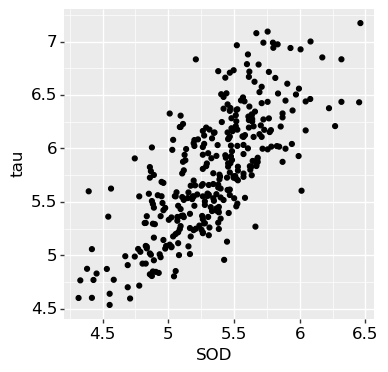

<ggplot: (136502899348)>


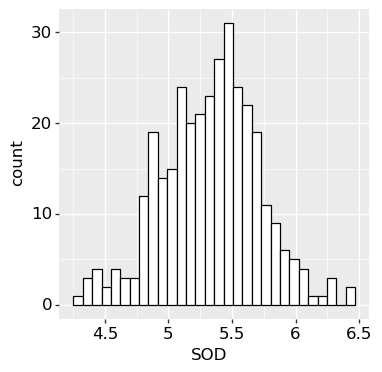

<ggplot: (136502909681)>


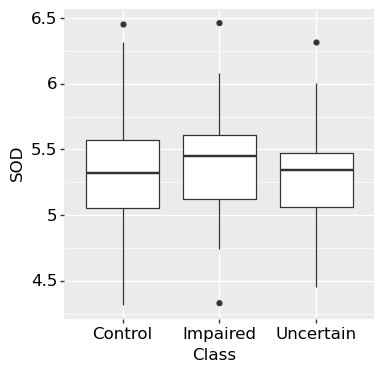

<ggplot: (136502899372)>


In [4]:
#-------------------------plotnine----------------------------
p1=(ggplot(df, aes(x='SOD',y='tau')) + 
  geom_point()+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4))) #shape=21,color="black",fill="red",size=3,stroke=0.1
print(p1)
#p1.save("scatter_plotnine.pdf") 

p2=(ggplot(df, aes(x='SOD')) + 
  geom_histogram(bins=30,colour="black",fill="white")+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4)))
print(p2)
#p2.save("hist_plotnine.pdf")


#df['Class']=df['Class'].astype(int)
p3=(ggplot(df, aes(x='Class',y='SOD'))+ 
  geom_boxplot(show_legend=False)+
  theme(text=element_text(size=12,colour = "black"),
        aspect_ratio =1,
        dpi=100,
       figure_size=(4,4)))
print(p3)
#p3.save("boxplot_plotnine.pdf")